In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Splits into x & y
x = df.drop('label',axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [7]:
df.shape

(20800, 5)

In [8]:
df = df.dropna()
df.shape

(18285, 5)

In [9]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
messages = df.copy()

In [11]:
#### After dropping null values some of the index get dropped so we can reset the index
messages.reset_index(inplace=True,drop=True)
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
import nltk
nltk.download('stopwords')
corpus = []
for i in range(len(messages)):
    review = re.sub('[^A-Za-z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [16]:
# Applying Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [17]:
x.shape

(18285, 5000)

In [18]:
y = messages['label']

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=0)

In [20]:
cv.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access'], dtype=object)

In [21]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [22]:
count_df = pd.DataFrame(xtrain,columns=cv.get_feature_names_out())
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# See full source and example:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# This function prints and plots the confusion matrix. Normalization can br applied by setting normalize=True

In [24]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print('Confusion matrix without Normalization')

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### MultinomialNB Algorithm

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [26]:
from sklearn import metrics
import numpy as np
import itertools

accuracy :   0.900
Normalized Confusion matrix


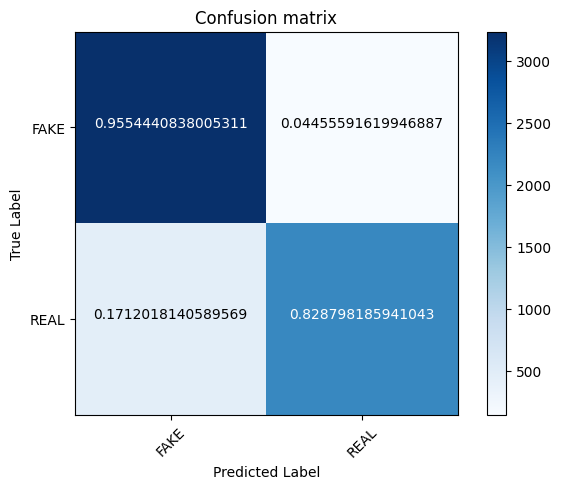

In [27]:
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)
score = metrics.accuracy_score(ytest,ypred)
print('accuracy :   %0.3f'% score)
cm = metrics.confusion_matrix(ytest,ypred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

### Passive Aggressive Classifier Algorithm

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy :   0.952
Normalized Confusion matrix


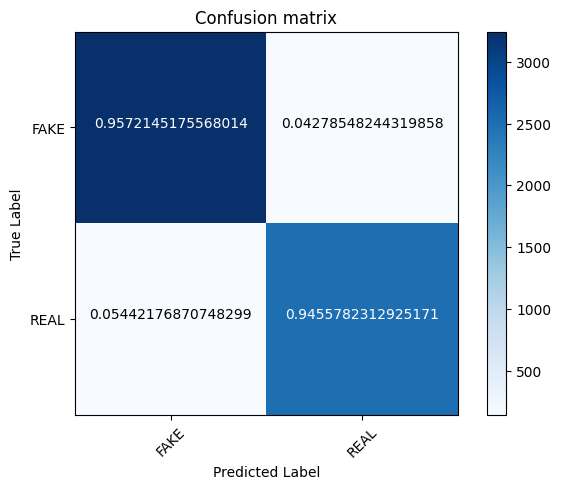

In [29]:
linear_clf.fit(xtrain,ytrain)
ypred = linear_clf.predict(xtest)
score = metrics.accuracy_score(ytest,ypred)
print('accuracy :   %0.3f'% score)
cm = metrics.confusion_matrix(ytest,ypred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

### Multinomial Classifier with HPT

In [30]:
classifier = MultinomialNB(alpha=0.1)

In [31]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(xtrain,ytrain)
    ypred = sub_classifier.predict(xtest)
    score = metrics.accuracy_score(ytest,ypred)
    if score > previous_score:
        classifier = sub_classifier
    print('Alpha: {}, score : {}'.format(alpha,score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, score : 0.9022369511184756
Alpha: 0.1, score : 0.9017398508699255
Alpha: 0.2, score : 0.9020712510356255
Alpha: 0.30000000000000004, score : 0.9022369511184756
Alpha: 0.4, score : 0.9020712510356255
Alpha: 0.5, score : 0.9014084507042254
Alpha: 0.6000000000000001, score : 0.9015741507870754
Alpha: 0.7000000000000001, score : 0.9012427506213753
Alpha: 0.8, score : 0.9009113504556753
Alpha: 0.9, score : 0.9005799502899752


In [32]:
# Get features names
feature_names = cv.get_feature_names_out()

In [33]:
feature_names

array(['aaron', 'abandon', 'abc', ..., 'zionist', 'zone', 'zu'],
      dtype=object)

In [34]:
classifier.feature_log_prob_[0] # (It returns coefficient & replaced by .coef_)

array([ -9.12693158,  -8.85404287,  -8.37578731, ..., -10.02440559,
        -8.72415806, -11.33915105])

In [35]:
# Most real
sorted(zip(classifier.feature_log_prob_[0],feature_names),reverse=True)[:20]

[(-4.8806604137777105, 'mr'),
 (-5.139321704939019, 'said'),
 (-5.4174508002237785, 'trump'),
 (-5.945904009383865, 'mr trump'),
 (-6.010439748361563, 'presid'),
 (-6.0597181356282315, 'state'),
 (-6.176438578227852, 'ms'),
 (-6.186978921465968, 'would'),
 (-6.190664081844223, 'one'),
 (-6.203719010990082, 'peopl'),
 (-6.213971635691953, 'new'),
 (-6.216849578098212, 'year'),
 (-6.31677136316521, 'time'),
 (-6.330066788761383, 'like'),
 (-6.405502286042062, 'report'),
 (-6.469793020402705, 'also'),
 (-6.506211037844363, 'say'),
 (-6.528582134080173, 'news'),
 (-6.532878319242008, 'american'),
 (-6.539461379556004, 'polic')]

In [36]:
# Most Fake
sorted(zip(classifier.feature_log_prob_[0],feature_names))[:20]

[(-11.384569945135524, 'auf'),
 (-11.384569945135524, 'en el'),
 (-11.384569945135524, 'fli zone'),
 (-11.384569945135524, 'html'),
 (-11.384569945135524, 'http co'),
 (-11.384569945135524, 'http www'),
 (-11.384569945135524, 'infowar life'),
 (-11.384569945135524, 'pic twitter com'),
 (-11.384569945135524, 'ufo'),
 (-11.384569945135524, 'utm'),
 (-11.363715819078537, 'brain forc'),
 (-11.362130833778155, 'twitter com'),
 (-11.348963751279618, 'oligarchi'),
 (-11.348833232513876, 'infowar com'),
 (-11.33915104590614, 'zu'),
 (-11.329820752669196, 'ein'),
 (-11.327340283772534, 'ist'),
 (-11.307187908874361, 'como'),
 (-11.306995492990557, 'kadzik'),
 (-11.295088488931421, 'una')]

### Hashing Vectorizer

In [37]:
hs_vectorizer = HashingVectorizer(n_features=15000,alternate_sign=False) # altenate_sign = False replaces non_negative = True
x = hs_vectorizer.fit_transform(corpus).toarray()

In [38]:
x.shape

(18285, 15000)

In [39]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=0)

accuracy :   0.861
Normalized Confusion matrix


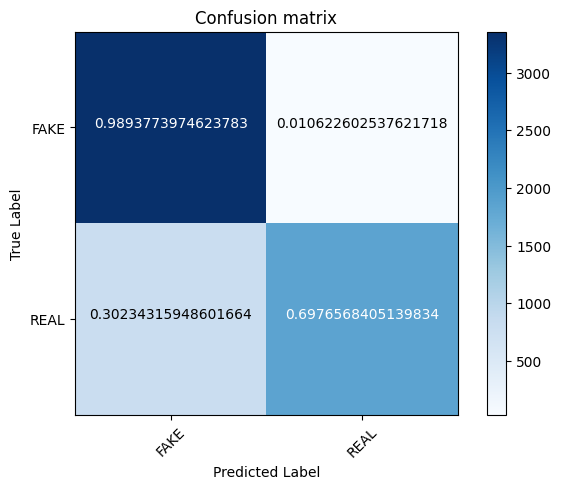

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)
score = metrics.accuracy_score(ytest,ypred)
print('accuracy :   %0.3f'% score)
cm = metrics.confusion_matrix(ytest,ypred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

#### Embedding Vectorizer

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# Vocabulary size
voc_size = 5000

#### Onehot Representation

In [44]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
print(onehot_repr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
sent_length = 20
embeded_docs = pad_sequences(onehot_repr,maxlen=sent_length)
print(embeded_docs)

[[ 436 4898  435 ... 2097  311  848]
 [3773 3230 1009 ... 1880 1321 3125]
 [2418 4616 1503 ... 1003 1865 4910]
 ...
 [3908  842 1313 ... 1572 1818 1795]
 [ 289 2086 3661 ... 3860  144 3937]
 [  92  445 1965 ... 1759  936 4691]]


In [46]:
embeded_docs[0]

array([ 436, 4898,  435, 2237, 4501,  830, 4048, 1552,  571, 2305,  359,
         66,  848,  333, 3997, 1510, 3356, 2097,  311,  848], dtype=int32)

In [47]:
len(embeded_docs)

18285

In [48]:
import numpy as np
xfinal = np.array(embeded_docs)
yfinal = np.array(y)

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xfinal,yfinal,test_size=0.33,random_state=42)

#### LSTM Model Training

In [50]:
# Creating model
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [51]:
# Finally Training
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=40,batch_size=64)

Epoch 1/40
192/192 [==============================] - 29s 111ms/step - loss: 0.4286 - accuracy: 0.7878 - val_loss: 0.3435 - val_accuracy: 0.8393
Epoch 2/40
192/192 [==============================] - 6s 30ms/step - loss: 0.2439 - accuracy: 0.8993 - val_loss: 0.3287 - val_accuracy: 0.8500
Epoch 3/40
192/192 [==============================] - 5s 24ms/step - loss: 0.1841 - accuracy: 0.9278 - val_loss: 0.3901 - val_accuracy: 0.8431
Epoch 4/40
192/192 [==============================] - 3s 13ms/step - loss: 0.1289 - accuracy: 0.9517 - val_loss: 0.4059 - val_accuracy: 0.8416
Epoch 5/40
192/192 [==============================] - 2s 12ms/step - loss: 0.0844 - accuracy: 0.9694 - val_loss: 0.4914 - val_accuracy: 0.8398
Epoch 6/40
192/192 [==============================] - 2s 11ms/step - loss: 0.0549 - accuracy: 0.9819 - val_loss: 0.5757 - val_accuracy: 0.8292
Epoch 7/40
192/192 [==============================] - 2s 11ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.7787 - val_accuracy: 0.83

#### Performance Metrics And Accuracy

In [52]:
ypred = model.predict(xtest)
ypred = np.where(ypred>0.5,1,0)

189/189 [==============================] - 1s 3ms/step


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[2832,  587],
       [ 513, 2103]])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8177299088649544

#### Creating model using Dropout

In [55]:
from tensorflow.keras.layers import Dropout
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
# Finally Training
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=40,batch_size=64)

Epoch 1/40
192/192 [==============================] - 19s 86ms/step - loss: 0.4421 - accuracy: 0.7703 - val_loss: 0.3346 - val_accuracy: 0.8471
Epoch 2/40
192/192 [==============================] - 5s 25ms/step - loss: 0.2584 - accuracy: 0.8913 - val_loss: 0.3258 - val_accuracy: 0.8515
Epoch 3/40
192/192 [==============================] - 3s 15ms/step - loss: 0.2080 - accuracy: 0.9154 - val_loss: 0.3417 - val_accuracy: 0.8509
Epoch 4/40
192/192 [==============================] - 4s 23ms/step - loss: 0.1605 - accuracy: 0.9373 - val_loss: 0.3839 - val_accuracy: 0.8476
Epoch 5/40
192/192 [==============================] - 3s 13ms/step - loss: 0.1275 - accuracy: 0.9516 - val_loss: 0.4713 - val_accuracy: 0.8459
Epoch 6/40
192/192 [==============================] - 3s 13ms/step - loss: 0.0991 - accuracy: 0.9656 - val_loss: 0.4639 - val_accuracy: 0.8411
Epoch 7/40
192/192 [==============================] - 2s 9ms/step - loss: 0.0800 - accuracy: 0.9714 - val_loss: 0.5887 - val_accuracy: 0.8418

#### Performance Metrics And Accuracy

In [57]:
ypred = model.predict(xtest)
ypred = np.where(ypred>0.5,1,0)

189/189 [==============================] - 1s 3ms/step


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[2759,  660],
       [ 400, 2216]])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.824357912178956